In [33]:
import xgboost as xgb
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

#### Datasets

In [34]:
train_data = pd.read_csv('train.csv')
train_data_cleaned = train_data.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])

#### Missing values n encoding

In [35]:
train_data_cleaned['Age'].fillna(train_data_cleaned['Age'].median(), inplace=True)
train_data_cleaned['Embarked'].fillna(train_data_cleaned['Embarked'].mode()[0], inplace=True)

label_encoder = LabelEncoder()
train_data_cleaned['Sex'] = label_encoder.fit_transform(train_data_cleaned['Sex'])
train_data_cleaned['Embarked'] = label_encoder.fit_transform(train_data_cleaned['Embarked'])

C:\Users\PPLG15\AppData\Local\Temp\ipykernel_5636\1899511775.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data_cleaned['Age'].fillna(train_data_cleaned['Age'].median(), inplace=True)
C:\Users\PPLG15\AppData\Local\Temp\ipykernel_5636\1899511775.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values 

#### Splitting Datasets

In [36]:
X = train_data_cleaned.drop('Survived', axis=1)
y = train_data_cleaned['Survived']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

#### Training Model

In [37]:
xgb_model = xgb.XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42,
    n_estimators=100,
    max_depth=3,
    learning_rate=0.1
)

xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_val)

accuracy = accuracy_score(y_val, y_pred)
print(f"Validation Accuracy: {accuracy}")

Validation Accuracy: 0.8212290502793296


c:\Users\PPLG15\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [09:14:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


#### Test Dataset Predict

In [38]:
sex_mapping = {'male': 1, 'female': 0}
embarked_mapping = {'S': 2, 'C': 0, 'Q': 1}

test_data = pd.read_csv('test.csv')

passenger_ids = test_data['PassengerId']

test_data_cleaned = test_data.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])

test_data_cleaned['Age'].fillna(test_data_cleaned['Age'].median(), inplace=True)
test_data_cleaned['Embarked'].fillna(test_data_cleaned['Embarked'].mode()[0], inplace=True)

test_data_cleaned['Sex'] = test_data_cleaned['Sex'].map(sex_mapping)
test_data_cleaned['Embarked'] = test_data_cleaned['Embarked'].map(embarked_mapping)

predictions = xgb_model.predict(test_data_cleaned)

output = pd.DataFrame({
    'PassengerId': passenger_ids,
    'Survived': predictions
})

for index, row in output.iterrows():
    print(f"{row['PassengerId']}, {row['Survived']}")


892, 0
893, 0
894, 0
895, 0
896, 0
897, 0
898, 1
899, 0
900, 1
901, 0
902, 0
903, 0
904, 1
905, 0
906, 1
907, 1
908, 0
909, 0
910, 1
911, 1
912, 0
913, 0
914, 1
915, 0
916, 1
917, 0
918, 1
919, 0
920, 0
921, 0
922, 0
923, 0
924, 1
925, 0
926, 1
927, 0
928, 1
929, 0
930, 0
931, 1
932, 0
933, 1
934, 0
935, 1
936, 1
937, 0
938, 0
939, 0
940, 1
941, 1
942, 0
943, 0
944, 1
945, 1
946, 0
947, 0
948, 0
949, 0
950, 0
951, 1
952, 0
953, 0
954, 0
955, 1
956, 0
957, 1
958, 1
959, 0
960, 0
961, 1
962, 1
963, 0
964, 1
965, 0
966, 1
967, 0
968, 0
969, 1
970, 0
971, 1
972, 1
973, 0
974, 0
975, 0
976, 0
977, 0
978, 1
979, 0
980, 1
981, 1
982, 0
983, 0
984, 1
985, 0
986, 0
987, 0
988, 1
989, 0
990, 0
991, 0
992, 1
993, 0
994, 0
995, 0
996, 1
997, 0
998, 0
999, 0
1000, 0
1001, 0
1002, 0
1003, 1
1004, 1
1005, 1
1006, 1
1007, 0
1008, 0
1009, 1
1010, 0
1011, 1
1012, 1
1013, 0
1014, 1
1015, 0
1016, 0
1017, 1
1018, 0
1019, 1
1020, 0
1021, 0
1022, 0
1023, 0
1024, 0
1025, 0
1026, 0
1027, 0
1028, 0
1029, 0
1030

C:\Users\PPLG15\AppData\Local\Temp\ipykernel_5636\3586061346.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_data_cleaned['Age'].fillna(test_data_cleaned['Age'].median(), inplace=True)
C:\Users\PPLG15\AppData\Local\Temp\ipykernel_5636\3586061346.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values 

#### Test vs Train

Percentage similarity for Not Survived (0): 91.67%
Percentage similarity for Survived (1): 86.63%


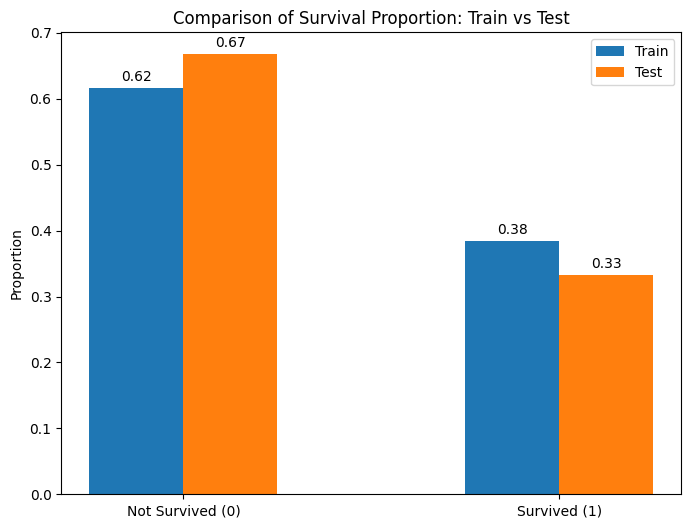

In [39]:
train_values = [train_survival_proportion[0], train_survival_proportion[1]]
test_values = [test_survival_proportion[0], test_survival_proportion[1]]

percentage_similarity = [
    (1 - abs(train_values[i] - test_values[i]) / train_values[i]) * 100 if train_values[i] != 0 else 0
    for i in range(len(train_values))
]

for i, label in enumerate(labels):
    print(f"Percentage similarity for {label}: {percentage_similarity[i]:.2f}%")

x = np.arange(len(labels))
width = 0.25

fig, ax = plt.subplots(figsize=(8, 6))

rects1 = ax.bar(x - width/2, train_values, width, label='Train')
rects2 = ax.bar(x + width/2, test_values, width, label='Test')

ax.set_ylabel('Proportion')
ax.set_title('Comparison of Survival Proportion: Train vs Test')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def add_labels(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), 
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(rects1)
add_labels(rects2)

plt.show()
